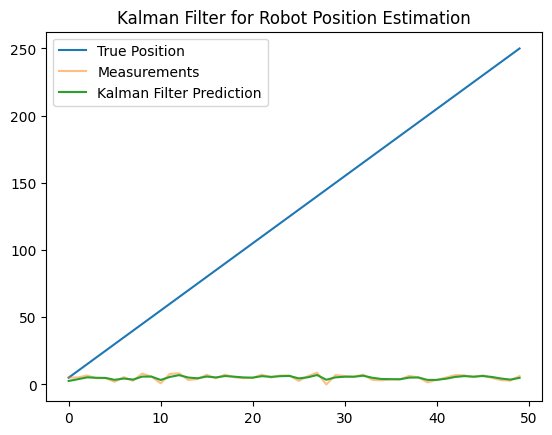

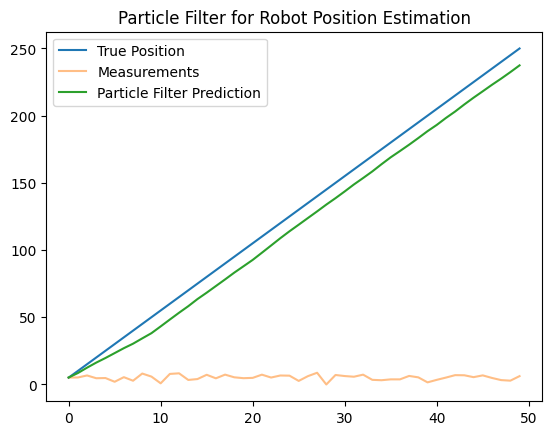

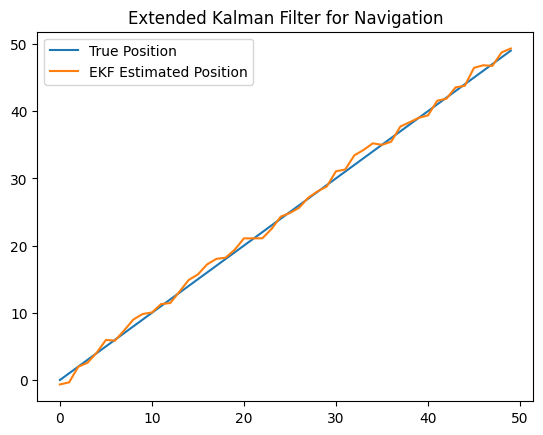

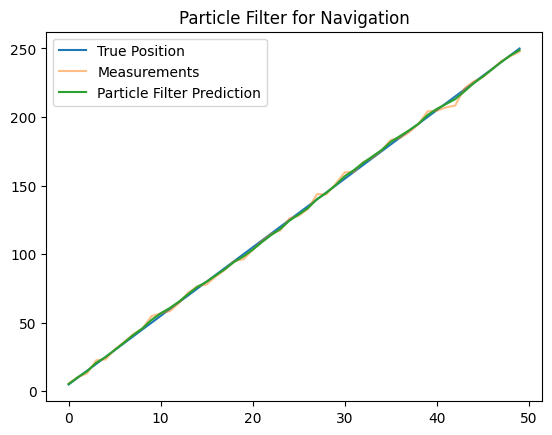

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Kalman Filter Implementation
class KalmanFilter:
    def __init__(self, initial_state, process_variance, measurement_variance):
        self.state_estimate = initial_state
        self.uncertainty = process_variance
        self.process_variance = process_variance
        self.measurement_variance = measurement_variance

    def predict(self, control_input=0):
        self.state_estimate += control_input
        self.uncertainty += self.process_variance

    def update(self, measurement):
        kalman_gain = self.uncertainty / (self.uncertainty + self.measurement_variance)
        self.state_estimate += kalman_gain * (measurement - self.state_estimate)
        self.uncertainty *= (1 - kalman_gain)

# Simulate Kalman Filter for Robot Position
kf = KalmanFilter(initial_state=0, process_variance=1, measurement_variance=2)
measurements = [5 + np.random.normal(0, 2) for _ in range(50)]
true_positions = np.cumsum([5] * 50)
predictions = []

for measurement in measurements:
    kf.predict()
    kf.update(measurement)
    predictions.append(kf.state_estimate)

plt.plot(true_positions, label='True Position')
plt.plot(measurements, label='Measurements', alpha=0.5)
plt.plot(predictions, label='Kalman Filter Prediction')
plt.legend()
plt.title('Kalman Filter for Robot Position Estimation')
plt.show()

# Particle Filter Implementation
class ParticleFilter:
    def __init__(self, num_particles, initial_state):
        self.num_particles = num_particles
        self.particles = np.random.normal(initial_state, 1, num_particles)

    def predict(self, control_input):
        self.particles += control_input + np.random.normal(0, 0.5, self.num_particles)

    def update(self, measurement):
        weights = np.exp(-0.5 * (self.particles - measurement) ** 2)
        # Check if the sum of weights is zero
        if weights.sum() == 0:
            # If sum is zero, assign uniform weights to avoid NaN
            weights = np.ones_like(weights) / self.num_particles
        else:
            # Otherwise, normalize weights as usual
            weights /= weights.sum()
        indices = np.random.choice(range(self.num_particles), size=self.num_particles, p=weights)
        self.particles = self.particles[indices]

    def estimate(self):
        return np.mean(self.particles)

pf = ParticleFilter(num_particles=100, initial_state=0)
pf_predictions = []

for measurement in measurements:
    pf.predict(control_input=5)
    pf.update(measurement)
    pf_predictions.append(pf.estimate())

plt.plot(true_positions, label='True Position')
plt.plot(measurements, label='Measurements', alpha=0.5)
plt.plot(pf_predictions, label='Particle Filter Prediction')
plt.legend()
plt.title('Particle Filter for Robot Position Estimation')
plt.show()

# Extended Kalman Filter (EKF) for Navigation (Simplified)
def ekf_navigation():
    # Assume simple robot with linear motion model and sensor fusion of IMU + Lidar
    state = np.array([0, 0])  # [position, velocity]
    cov = np.eye(2)
    process_noise = np.array([[1, 0], [0, 1]])
    measurement_noise = np.eye(2)

    true_trajectory = [np.array([i, 1]) for i in range(50)]
    measurements = [state + np.random.normal(0, 1, 2) for state in true_trajectory]

    estimated_states = []
    for z in measurements:
        # Prediction
        state = state + np.array([state[1], 0])
        cov = cov + process_noise

        # Update
        kalman_gain = cov @ np.linalg.inv(cov + measurement_noise)
        state = state + kalman_gain @ (z - state)
        cov = (np.eye(2) - kalman_gain) @ cov

        estimated_states.append(state)

    true_positions = [pos[0] for pos in true_trajectory]
    estimated_positions = [pos[0] for pos in estimated_states]
    plt.plot(true_positions, label='True Position')
    plt.plot(estimated_positions, label='EKF Estimated Position')
    plt.legend()
    plt.title('Extended Kalman Filter for Navigation')
    plt.show()

ekf_navigation()

# Particle Filter for Navigation (Simplified)
def particle_filter_navigation():
    num_particles = 100
    particles = np.random.normal(0, 1, num_particles)

    true_positions = np.cumsum([5] * 50)
    measurements = true_positions + np.random.normal(0, 2, 50)
    predictions = []

    for measurement in measurements:
        particles += 5 + np.random.normal(0, 0.5, num_particles)
        weights = np.exp(-0.5 * (particles - measurement) ** 2)
        weights /= weights.sum()
        indices = np.random.choice(range(num_particles), size=num_particles, p=weights)
        particles = particles[indices]
        predictions.append(np.mean(particles))

    plt.plot(true_positions, label='True Position')
    plt.plot(measurements, label='Measurements', alpha=0.5)
    plt.plot(predictions, label='Particle Filter Prediction')
    plt.legend()
    plt.title('Particle Filter for Navigation')
    plt.show()

particle_filter_navigation()